In [9]:
import os
import random
import tqdm

import numpy as np
import cv2

import matplotlib.pyplot as plt

PATH = os.getcwd()

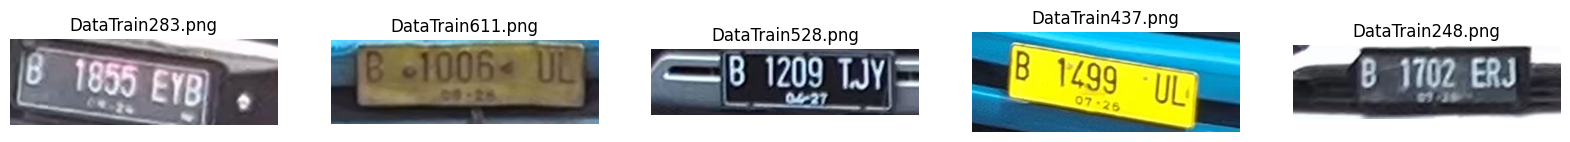

In [ ]:
random_numbers = random.sample(range(1, 801), 5)

random_images = [f'DataTrain{num}.png' for num in random_numbers]
random_images = [cv2.imread(os.path.join(PATH, 'Train', img_file)) for img_file in random_images]

fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for ax, img_file in zip(axes, random_images):
    image = cv2.imread(os.path.join(PATH, 'Train', img_file))
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.axis('off')
    ax.set_title(img_file)

plt.show()

random_images = [cv2.imread(os.path.join(PATH, 'Train', img_file)) for img_file in random_images]

In [ ]:
def process_image(image, idx):
    fig, axes = plt.subplots(2, 3, figsize=(15, 6))
    axes = axes.ravel()

    # Citra asli
    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Konversi ke Greyscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    axes[1].imshow(image, cmap='gray')
    axes[1].set_title('Greyscale Image')
    axes[1].axis('off')
    
    # Penerapan bilateral filter
    # image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
    image = cv2.bilateralFilter(image, d=5, sigmaColor=75, sigmaSpace=75)
    axes[2].imshow(image, cmap='gray')
    axes[2].set_title('Bilateral Filtered Image')
    axes[2].axis('off')
    
    # Penerapan Normalisasi CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    image = clahe.apply(image)
    axes[3].imshow(image, cmap='gray')
    axes[3].set_title('CLAHE Image')
    axes[3].axis('off')
    
    # Thresholding
    # _, image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) # Thresholding Otsu
    _, image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV) # Thresholding biasa
    axes[4].imshow(image, cmap='gray')
    axes[4].set_title('Thresholded Image')
    axes[4].axis('off')
    
    # Penerapan dilasi dengan kernel strel 3x3
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    image = cv2.dilate(image, kernel, iterations=1)
    axes[5].imshow(image, cmap='gray')
    axes[5].set_title('Dilated Image')
    axes[5].axis('off')
    
    # plt.tight_layout()
    # plt.savefig(f'./plots/{idx}.png')
    fig.suptitle(f'Preprocessing Steps for Image {idx}', fontsize=16)
    plt.show()
    plt.close()
    return image

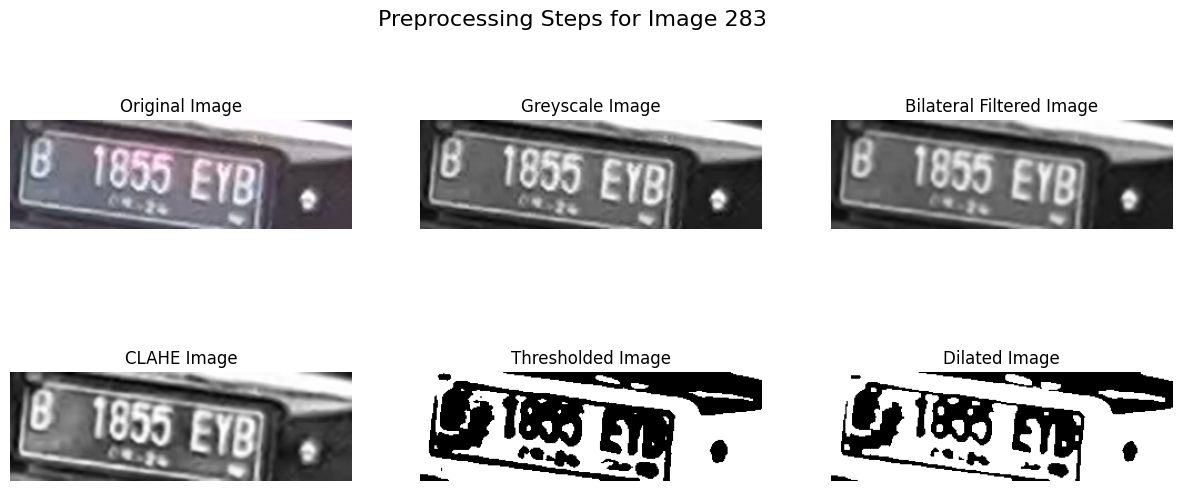

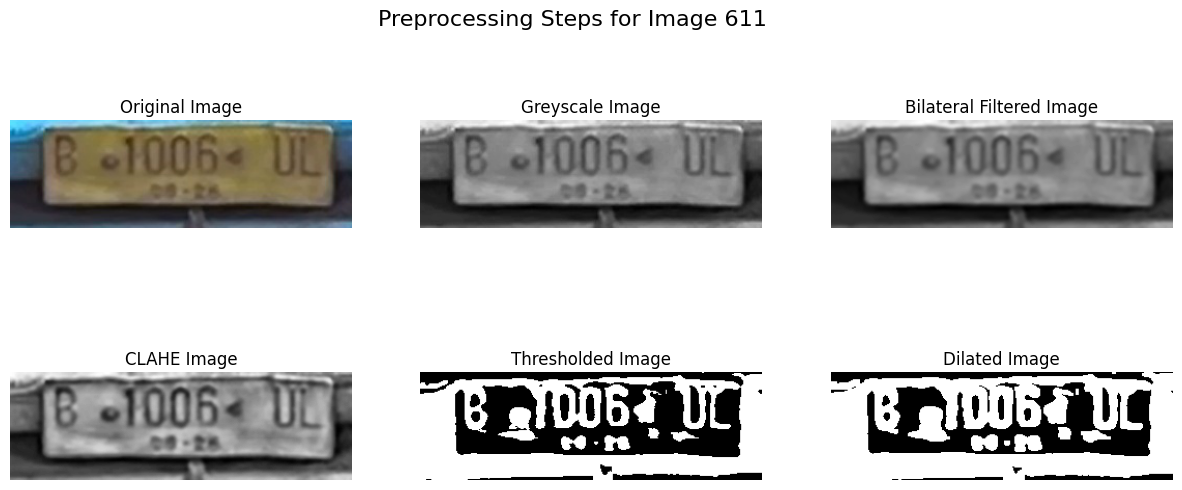

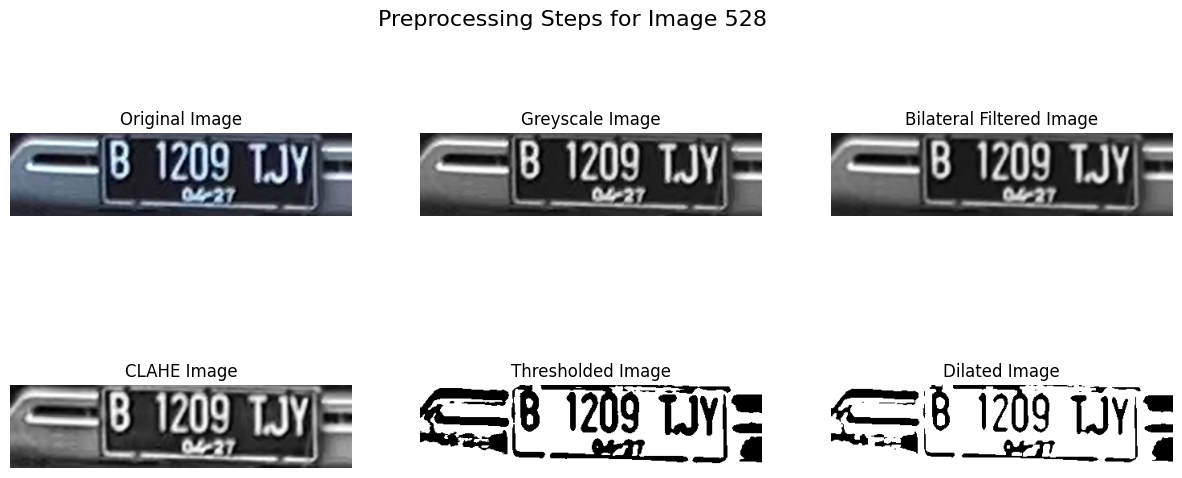

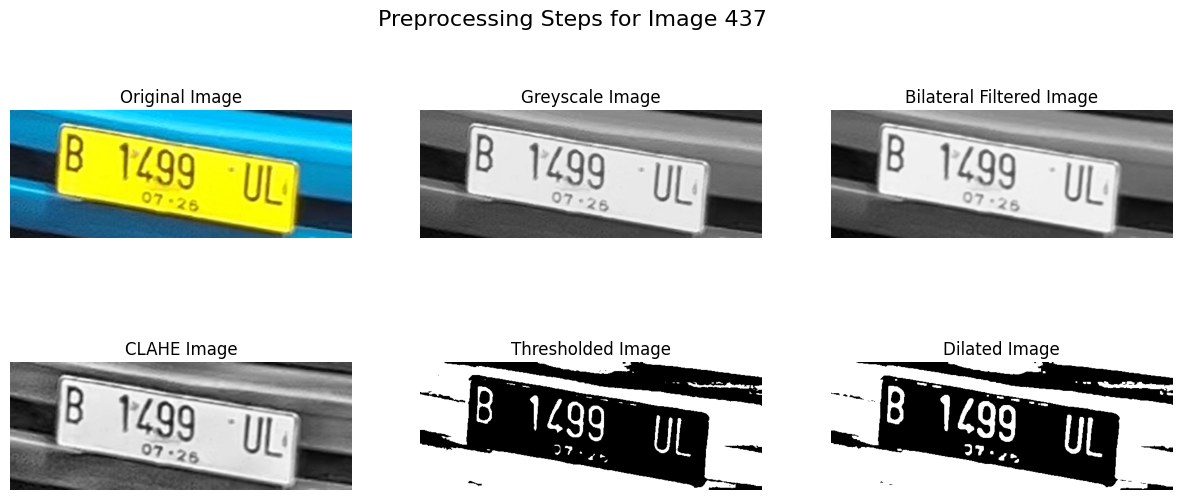

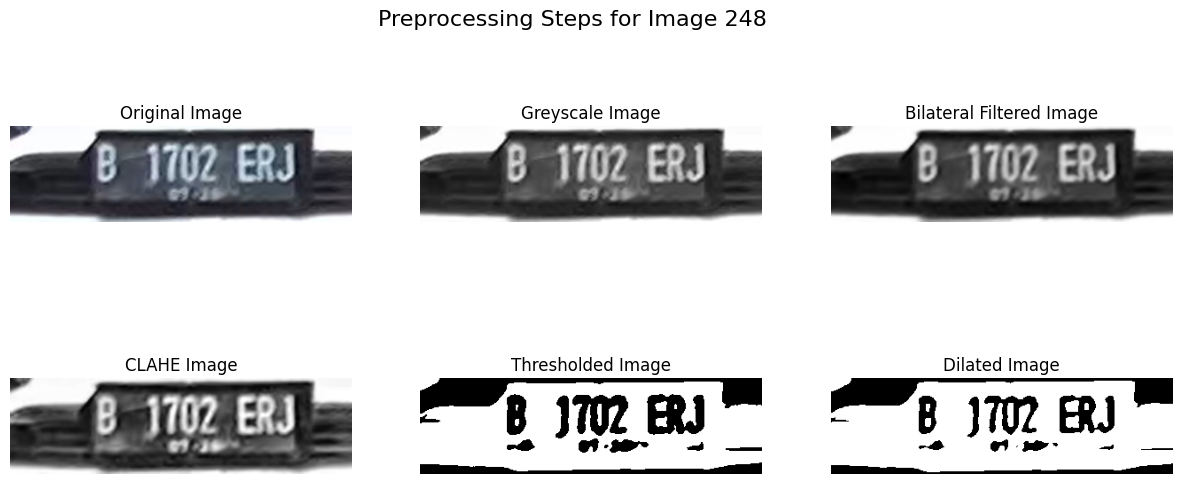

In [23]:
for i, img in zip(random_numbers, random_images):
    processed_image = process_image(img, i)